<a href="https://colab.research.google.com/github/Abhinavji65/py/blob/master/%20Garment%20Firm%20Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("garments_worker_productivity.csv")

In [5]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df.shape

(1197, 15)

In [7]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [10]:
df.quarter.value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [11]:
df[df['quarter']=='Quarter5'].date.unique()

array(['1/29/2015', '1/31/2015'], dtype=object)

quarter 5 contains only 2 dates as 29th January and 31st January.

In [12]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

There are 3 departments namely sweing,finishing and finishing but we make group of 2

In [13]:
df_1 = df.replace(['finishing '],['finishing'])

In [14]:
df_1['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

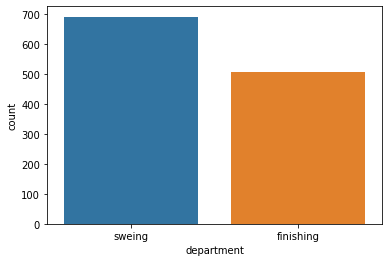

In [15]:
sns.countplot(x ='department', data=df_1)

In [16]:
df_1['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

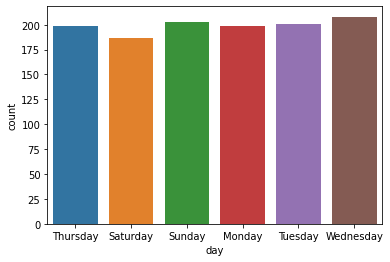

In [17]:
sns.countplot(x='day',data=df_1)

Friday is not a working day

In [18]:
df_1.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [19]:
df_1['team'].value_counts()

8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

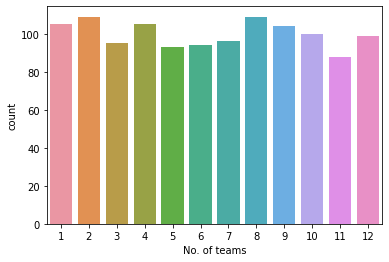

In [20]:
sns.countplot(x='team',data=df_1)
plt.xlabel('No. of teams')
plt.show()

In [21]:
df_1.targeted_productivity.value_counts()

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

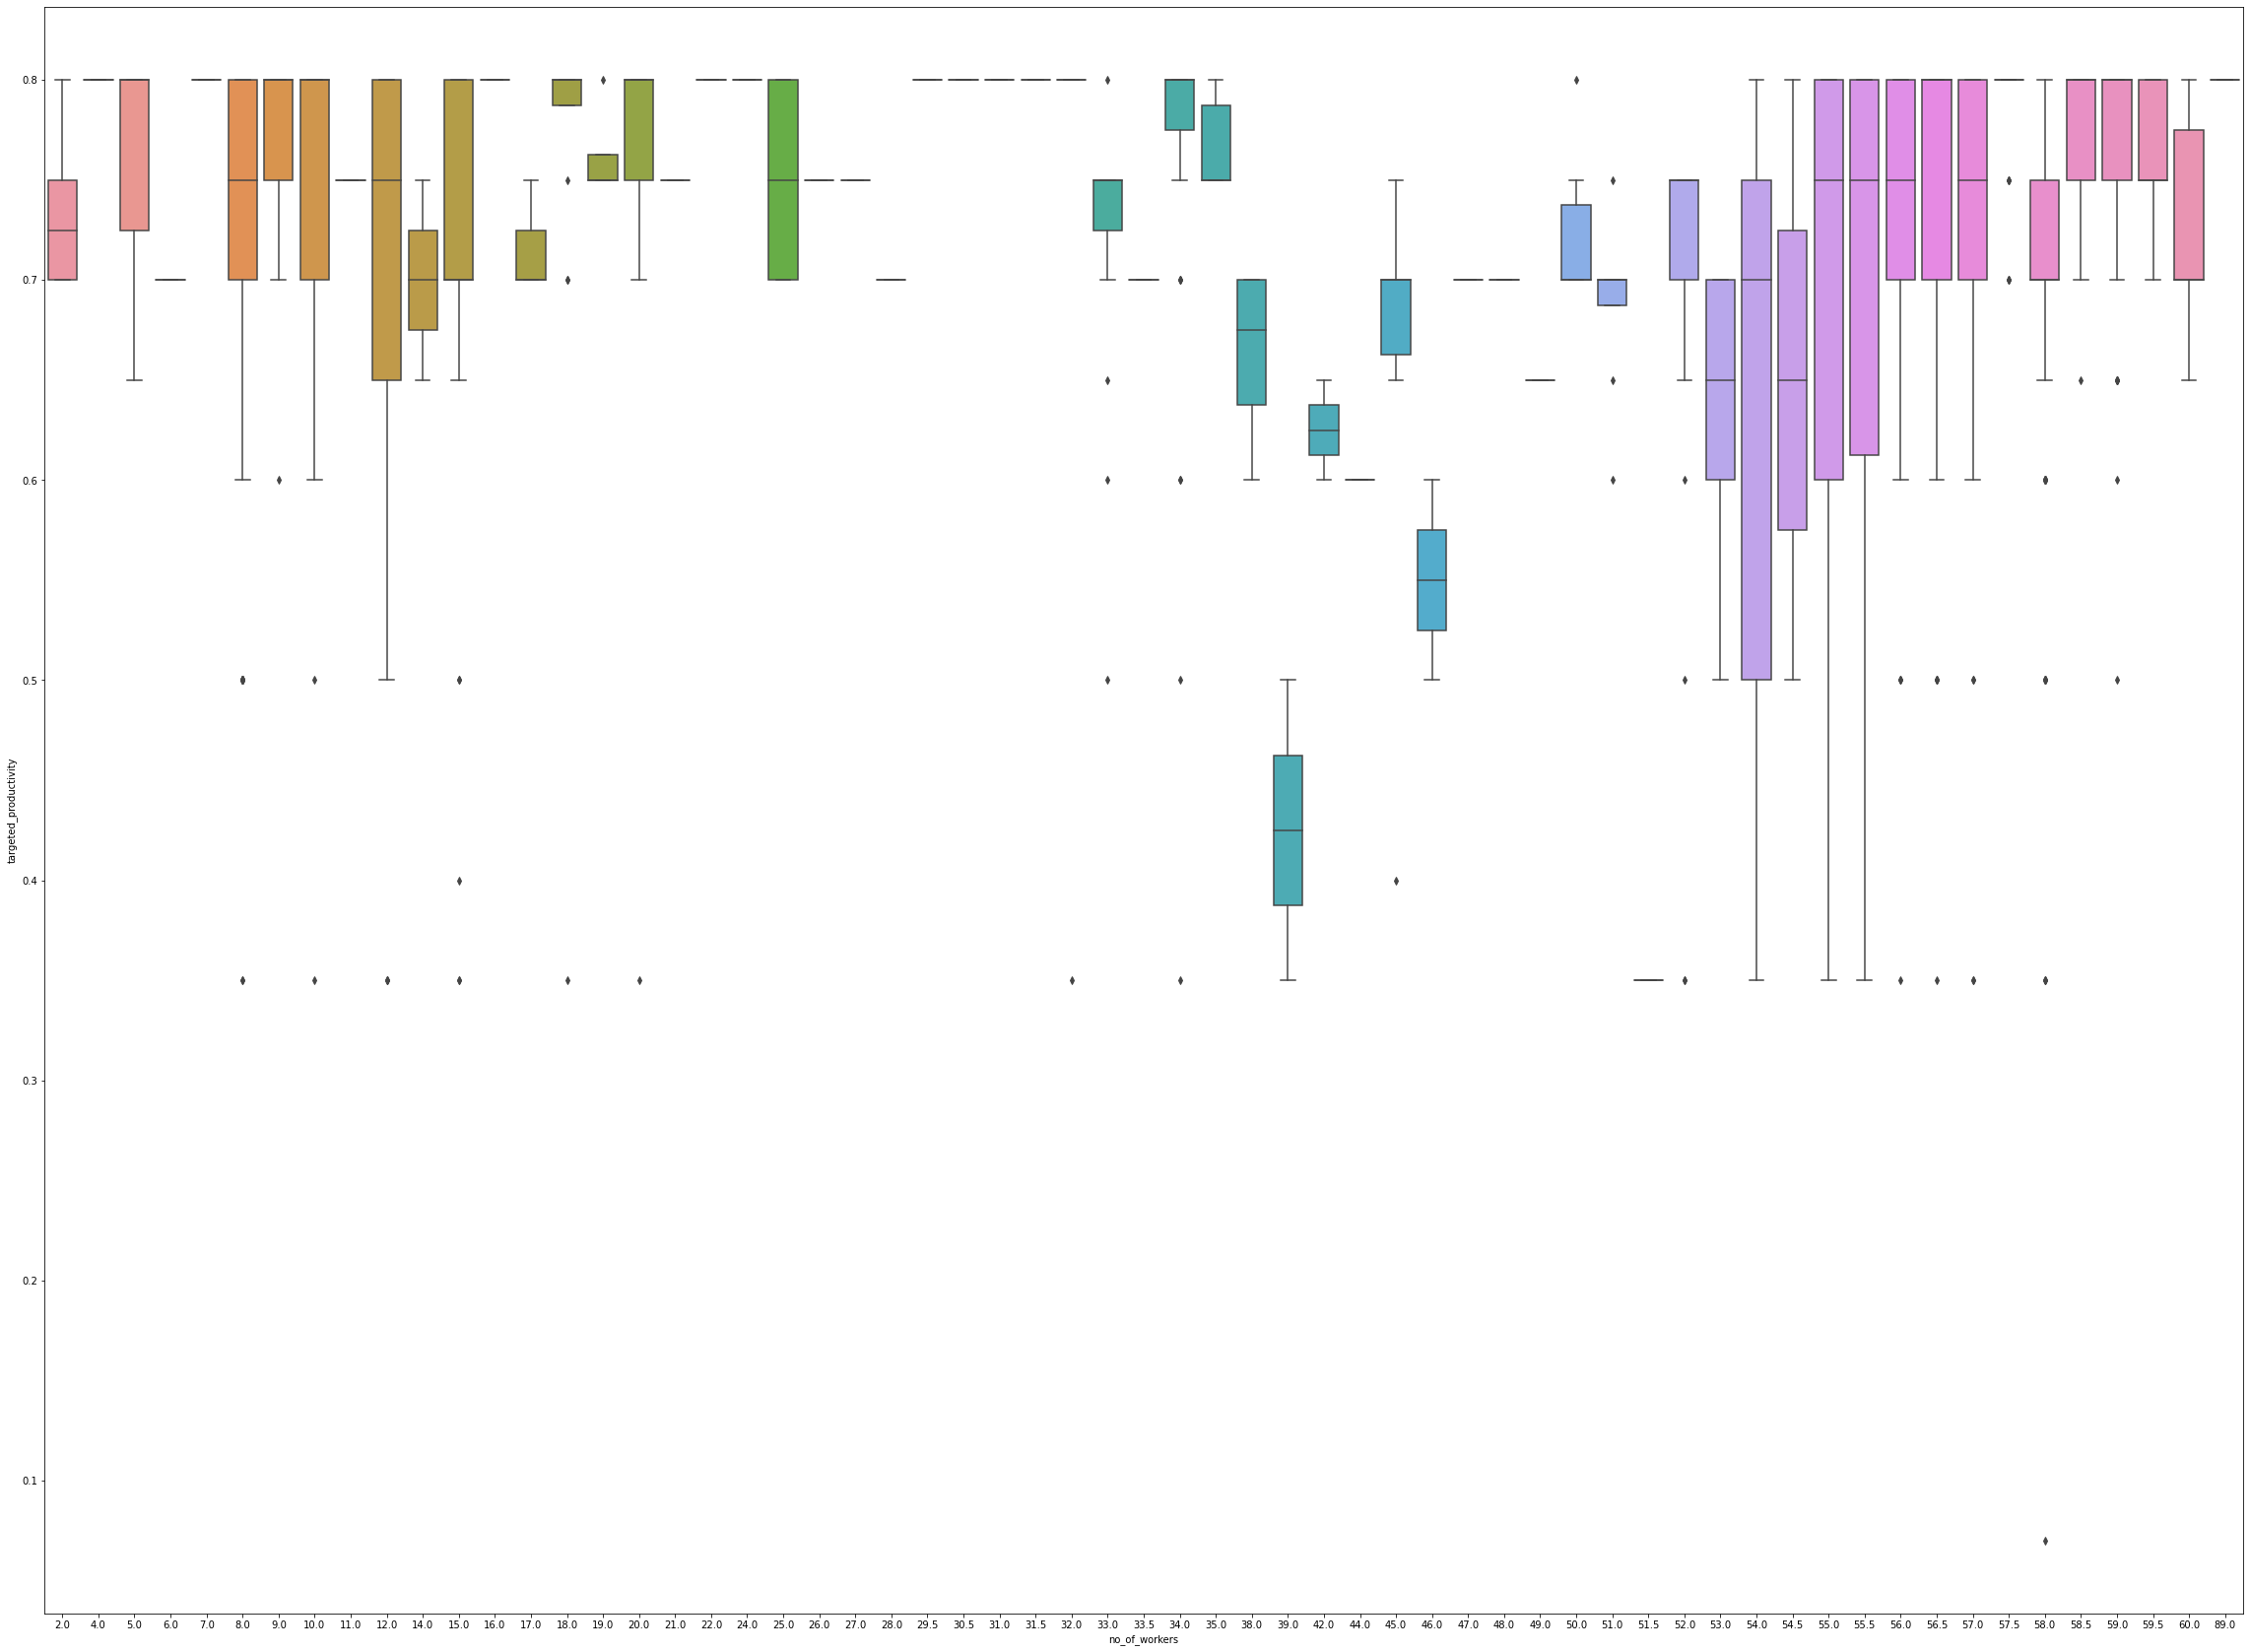

In [22]:
plt.figure(figsize=(40,30))
sns.boxplot(x='no_of_workers',y='targeted_productivity',data=df_1)


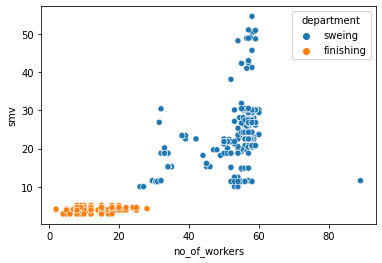

In [23]:
sns.scatterplot(x='no_of_workers',y='smv',data=df_1,hue='department')

In [24]:
df_1.wip.isnull().sum()

506

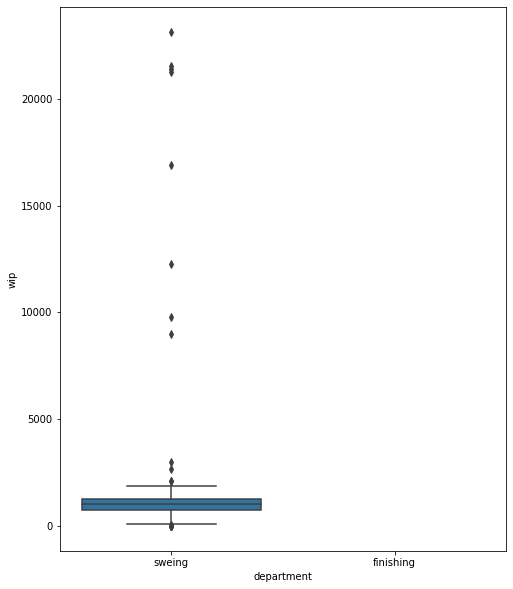

In [25]:
plt.figure(figsize = (8,10))
sns.boxplot(x='department',y='wip',data=df_1)

from this graph it is clear that finishing department has no wip that means we can replace all wip with 0 

In [26]:
df_1['wip'] = df_1['wip'].fillna(0)

In [27]:
#df_1.wip.isna().sum()

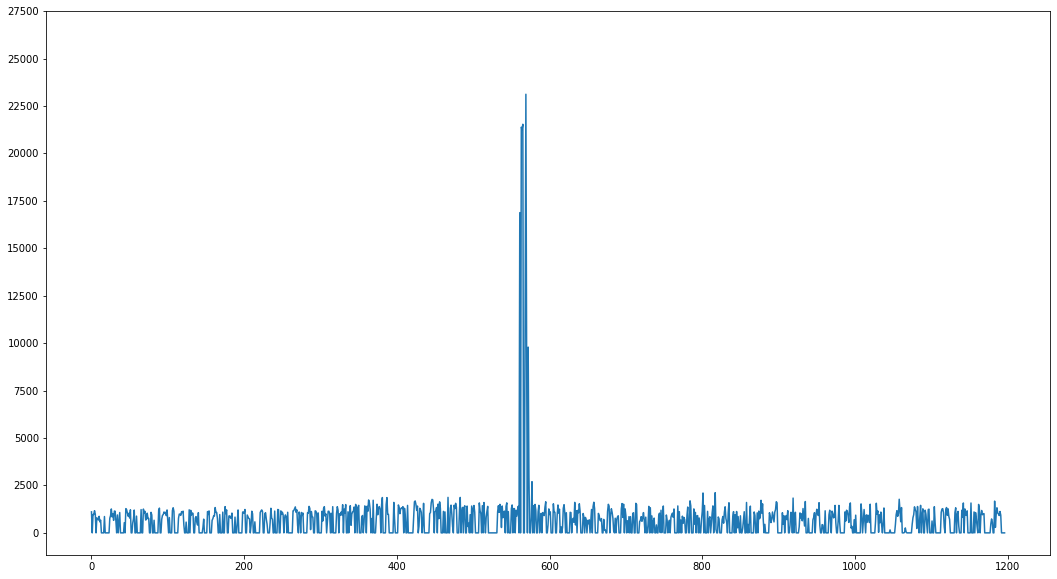

In [28]:
plt.figure(figsize=(18,10))
plt.plot(df_1.index,df_1.wip)
plt.yticks(np.arange(0,30000,step=2500))
plt.show()


In [29]:
df_1[df_1['wip']>2500]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
563,2/2/2015,Quarter1,sweing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,2/2/2015,Quarter1,sweing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
565,2/2/2015,Quarter1,sweing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
568,2/2/2015,Quarter1,sweing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
569,2/2/2015,Quarter1,sweing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
570,2/2/2015,Quarter1,sweing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
572,2/2/2015,Quarter1,sweing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398
573,2/2/2015,Quarter1,sweing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355
577,2/2/2015,Quarter1,sweing,Monday,7,0.70,24.26,2698.0,6720,0,0.0,0,0,56.0,0.295308


Highest WIP is in quarter1 and sweing department

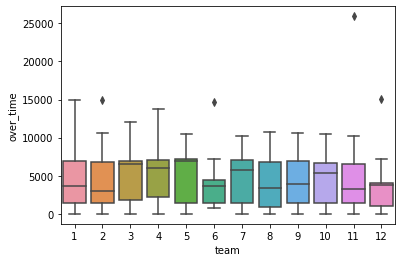

In [30]:
sns.boxplot(x='team',y='over_time',data=df_1)

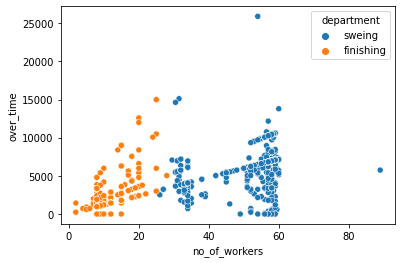

In [31]:
sns.scatterplot(x='no_of_workers',y='over_time',hue = 'department',data=df_1)

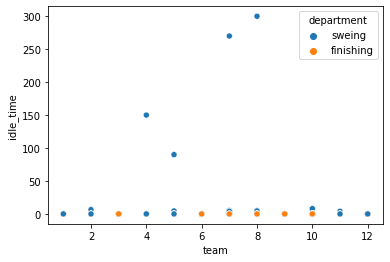

In [32]:
sns.scatterplot(x='team',y ='idle_time',hue = 'department', data=df_1)

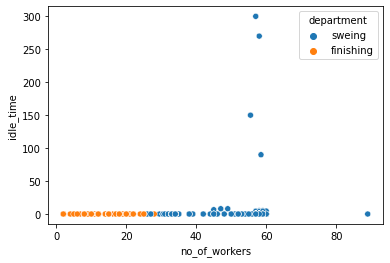

In [33]:
sns.scatterplot(x='no_of_workers',y ='idle_time',hue = 'department', data=df_1)

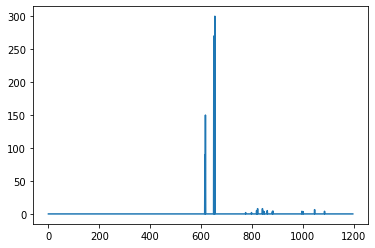

In [34]:
plt.plot(df_1.index,df_1.idle_time)

In [35]:
df_1[df_1.idle_time>20]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319


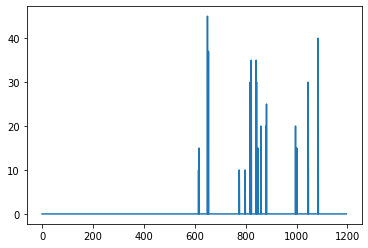

In [36]:
plt.plot(df_1.index,df_1.idle_men)

In [37]:
df_1[df_1.idle_men>0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


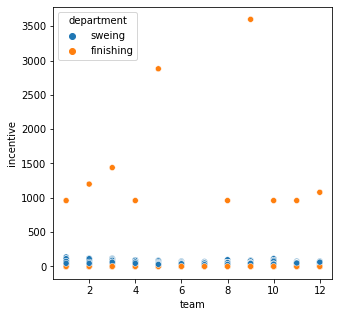

In [38]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='team',y='incentive',hue='department',data=df_1)
plt.show()

In [39]:
df_1.no_of_style_change.value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

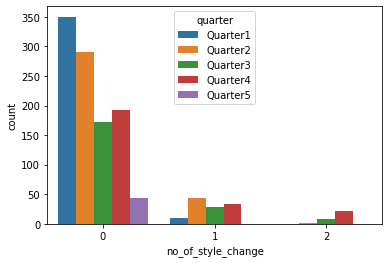

In [40]:
sns.countplot(x = 'no_of_style_change',hue='quarter',data=df_1)

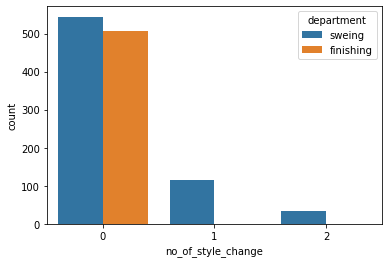

In [41]:
sns.countplot(x ='no_of_style_change',hue = 'department', data=df_1)

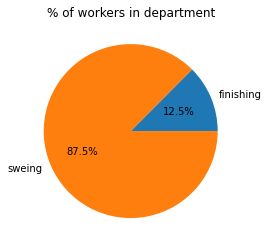

In [42]:
workers= df_1.groupby('department').no_of_workers.sum()
workers.plot.pie(title="% of workers in department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


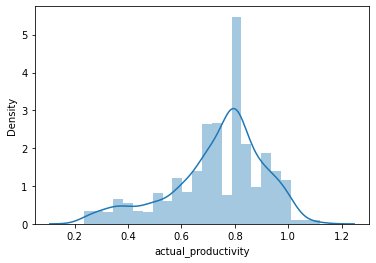

In [43]:
sns.distplot(df_1.actual_productivity)

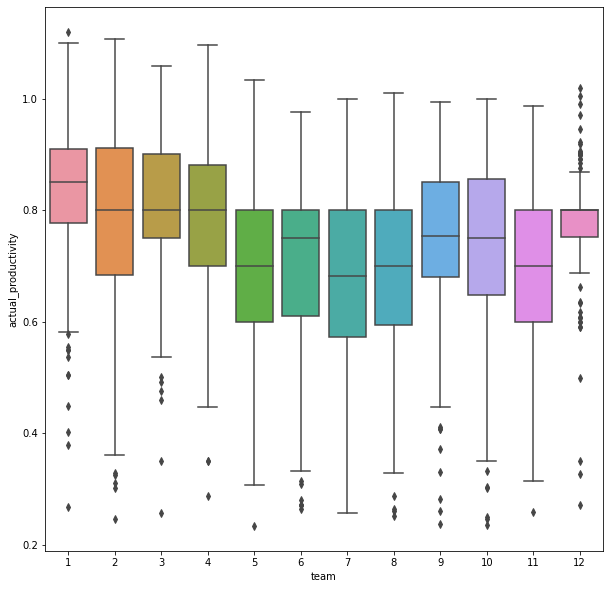

In [44]:
plt.figure(figsize=(10,10))
sns.boxplot(x='team',y='actual_productivity',data=df_1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


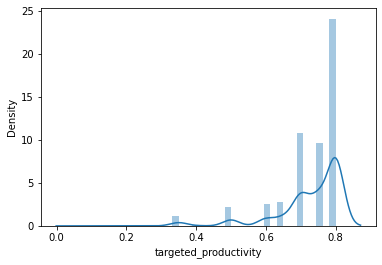

In [45]:
sns.distplot(df_1.targeted_productivity)

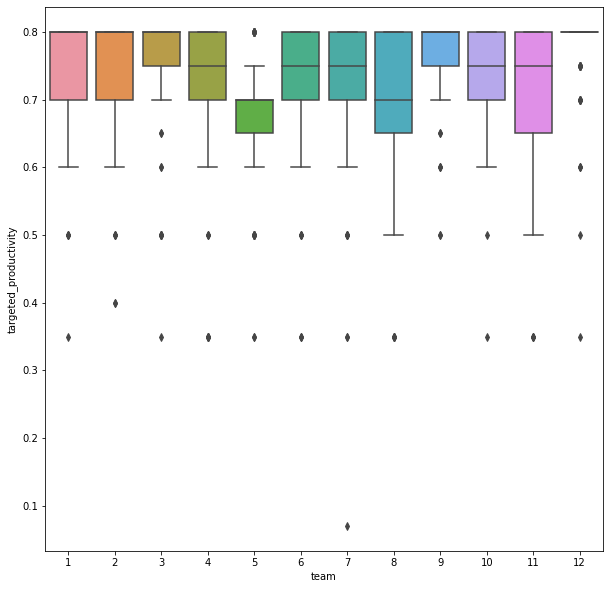

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(x='team',y='targeted_productivity',data=df_1)

compare targeted and actual productivity

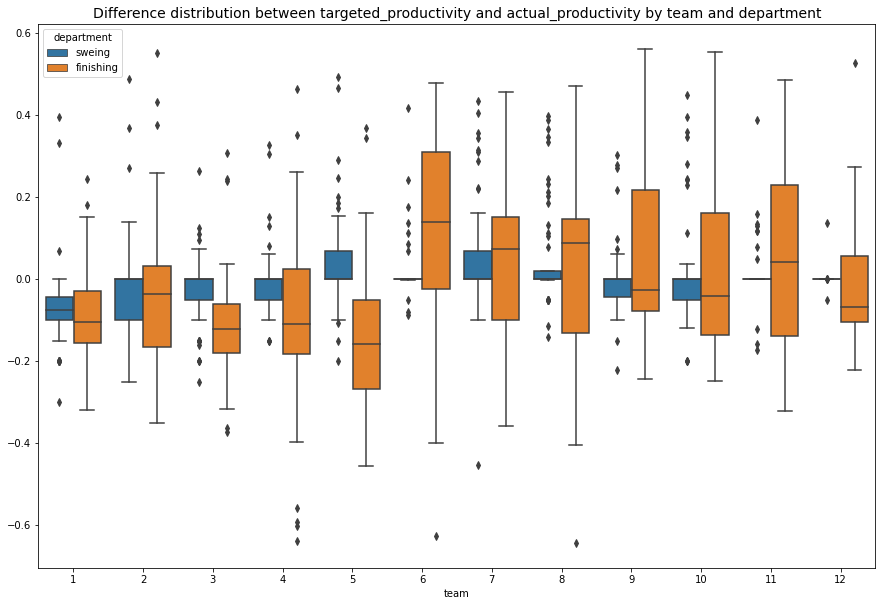

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(x='team',y=df_1.targeted_productivity-df_1.actual_productivity,hue='department', data=df_1)
plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

In [48]:

mask = np.zeros(corr.shape)
mask[np.triu_indices(len(mask))]=True

NameError: ignored

In [49]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,mask=mask)

NameError: ignored

<Figure size 720x576 with 0 Axes>

In [50]:
#drop smv as it is highly related with no_of_workers
df_1 = df_1.drop('smv',axis=1)

In [51]:
df_1.head()

,date,quarter,department,day,team,targeted_productivity,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [52]:
df_1 = df_1.drop('date',axis=1)

In [53]:
df_1 = pd.get_dummies(df_1)

In [54]:
df_1.columns

Index(['team', 'targeted_productivity', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_1["no_of_style_change_enc"] = le.fit_transform(df_1["no_of_style_change"])
df_1.head()

,team,targeted_productivity,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,no_of_style_change_enc
0,8,0.80,1108.0,7080,98,0.0,0,0,59.0,0.940725,...,0,0,1,0,0,0,1,0,0,0
1,1,0.75,0.0,960,0,0.0,0,0,8.0,0.886500,...,0,1,0,0,0,0,1,0,0,0
2,11,0.80,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,1,0,0,0,1,0,0,0
3,12,0.80,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,1,0,0,0,1,0,0,0
4,6,0.80,1170.0,1920,50,0.0,0,0,56.0,0.800382,...,0,0,1,0,0,0,1,0,0,0


In [56]:
df_1['prod']=df_1.targeted_productivity-df_1.actual_productivity

In [57]:
df_1.columns

Index(['team', 'targeted_productivity', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'quarter_Quarter1', 'quarter_Quarter2',
       'quarter_Quarter3', 'quarter_Quarter4', 'quarter_Quarter5',
       'department_finishing', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'no_of_style_change_enc', 'prod'],
      dtype='object')

In [58]:
df_1['Target_label']=np.nan
df_1.head()
df_1.loc[df_1['prod']<0,'Target_label'] = -1
df_1.loc[(df_1['prod']==0), 'Target_label'] = 0
df_1.loc[df_1['prod']>0, 'Target_label'] = 1
df_1.head()

,team,targeted_productivity,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,no_of_style_change_enc,prod,Target_label
0,8,0.80,1108.0,7080,98,0.0,0,0,59.0,0.940725,...,1,0,0,0,1,0,0,0,-0.140725,-1.0
1,1,0.75,0.0,960,0,0.0,0,0,8.0,0.886500,...,0,0,0,0,1,0,0,0,-0.136500,-1.0
2,11,0.80,968.0,3660,50,0.0,0,0,30.5,0.800570,...,1,0,0,0,1,0,0,0,-0.000570,-1.0
3,12,0.80,968.0,3660,50,0.0,0,0,30.5,0.800570,...,1,0,0,0,1,0,0,0,-0.000570,-1.0
4,6,0.80,1170.0,1920,50,0.0,0,0,56.0,0.800382,...,1,0,0,0,1,0,0,0,-0.000382,-1.0


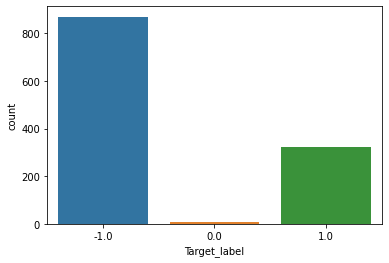

In [59]:
sns.countplot(x='Target_label',data=df_1)

In [60]:
df_1['Target_label'] = [-1 if x==-1 else 1 for x in df_1['Target_label']]

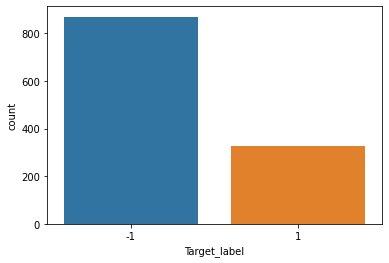

In [61]:
sns.countplot(x='Target_label',data=df_1)

In [64]:
import imblearn

In [69]:
from imblearn.over_sampling import SMOTE
X = df_1.loc[:, df_1.columns != 'Target_label']
y = df_1.Target_label
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X, y)

In [71]:
X_smote.shape,y_smote.shape

((1738, 25), (1738,))

In [72]:
df_n = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df_n.shape

(1738, 26)

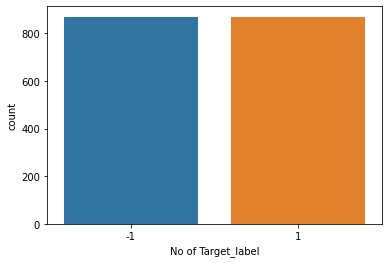

In [74]:
ax = sns.countplot(x = 'Target_label', data = df_n )
plt.xlabel('No of Target_label')

plt.show()

In [78]:
X = df_n.drop('Target_label',axis=1)
y=df_n['Target_label']

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [80]:
X_train.shape

(1216, 25)

In [81]:
X_test.shape

(522, 25)

In [82]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

AttributeError: module 'sklearn.utils._openmp_helpers' has no attribute '__pyx_capi__'